# **Project Name**    -  Paisabazaar Banking Fraud Analysis


##### **Project Type**    - EDA
##### **Contribution**    - Individual

# Business Context
Paisabazaar is a financial services company that assists customers in finding and applying for various banking and credit products. An integral part of their service is assessing the creditworthiness of individuals, which is crucial for both loan approval and risk management. The credit score of a person is a significant metric used by financial institutions to determine the likelihood that an individual will repay their loans or credit balances. Accurate classification of credit scores can help Paisabazaar enhance their credit assessment processes, reduce the risk of loan defaults, and offer personalized financial advice to their customers.

In this context, analyzing and classifying credit scores based on customer data can improve decision-making processes and contribute to better financial product recommendations. This case study aims to develop a model that predicts the credit score of individuals based on various features, such as income, credit card usage, and payment behavior.

##Dataset description
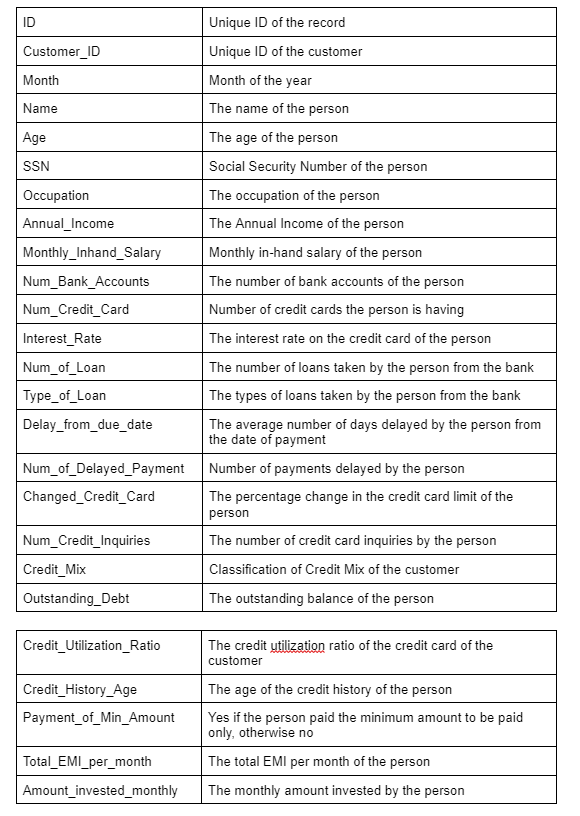

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.figure_factory as ff

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',1000)

### Dataset Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/loan_dataset.csv')

### Dataset First View

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Dataset Rows & Columns count

In [ ]:
df.shape

(100000, 28)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [ ]:
df.duplicated().sum().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


<Axes: >

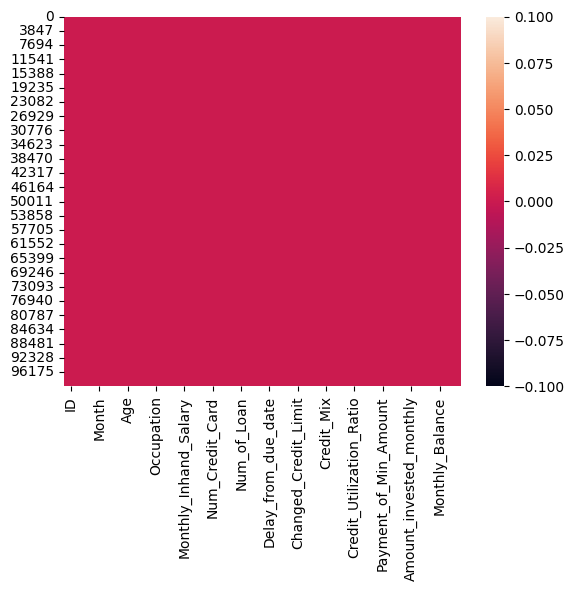

In [ ]:
#visualizing the missing values
sns.heatmap(df.isnull(), cbar='blue')

##Findings till now
*   there is no duplicate row in our datset
*   there is no missing missing values in columns
*   our dataset has 100000 rows and 28 columns.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
# Dataset Columns
df_dtypes = df.dtypes.reset_index()
df_dtypes.columns = ["Column", "Dtype"]
df_dtypes

,Column,Dtype
0,ID,int64
1,Customer_ID,int64
2,Month,int64
3,Name,object
4,Age,float64
5,SSN,float64
6,Occupation,object
7,Annual_Income,float64
8,Monthly_Inhand_Salary,float64
9,Num_Bank_Accounts,float64


In [ ]:
# Dataset Describe
df.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000,100000.00000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,NaN,NaN,NaN,10128,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,6261,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,Jessicad,NaN,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,No Data,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,48,NaN,NaN,7096,NaN,NaN,NaN,NaN,NaN,NaN,11408,NaN,NaN,NaN,NaN,45848,NaN,NaN,NaN,52326,NaN,NaN,28616,NaN,53174
mean,80631.500000,25982.666640,4.500000,NaN,33.316340,5.004617e+08,NaN,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,NaN,21.08141,13.313120,10.470323,5.798250,NaN,1426.220376,32.285173,221.220460,NaN,107.699208,55.101315,NaN,392.697586,NaN
std,43301.486619,14340.543051,2.291299,NaN,10.764812,2.908267e+08,NaN,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,NaN,14.80456,6.237166,6.609481,3.867826,NaN,1155.129026,5.116875,99.680716,NaN,132.267056,39.006932,NaN,201.652719,NaN
min,5634.000000,1006.000000,1.000000,NaN,14.000000,8.134900e+04,NaN,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,NaN,0.00000,0.000000,0.500000,0.000000,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,43132.750000,13664.500000,2.750000,NaN,24.000000,2.451686e+08,NaN,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,NaN,10.00000,9.000000,5.380000,3.000000,NaN,566.072500,28.052567,144.000000,NaN,29.268886,27.959111,NaN,267.615983,NaN
50%,80631.500000,25777.000000,4.500000,NaN,33.000000,5.006886e+08,NaN,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,NaN,18.00000,14.000000,9.400000,5.000000,NaN,1166.155000,32.305784,219.000000,NaN,66.462304,45.156550,NaN,333.865366,NaN
75%,118130.250000,38385.000000,6.250000,NaN,42.000000,7.560027e+08,NaN,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,NaN,28.00000,18.000000,14.850000,8.000000,NaN,1945.962500,36.496663,302.000000,NaN,147.392573,71.295797,NaN,463.215683,NaN


In [ ]:
# Check Unique Values for each Columns.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  ID is 100000
No. of unique values in  Customer_ID is 12500
No. of unique values in  Month is 8
No. of unique values in  Name is 10128
No. of unique values in  Age is 43
No. of unique values in  SSN is 12500
No. of unique values in  Occupation is 15
No. of unique values in  Annual_Income is 12488
No. of unique values in  Monthly_Inhand_Salary is 13241
No. of unique values in  Num_Bank_Accounts is 12
No. of unique values in  Num_Credit_Card is 12
No. of unique values in  Interest_Rate is 34
No. of unique values in  Num_of_Loan is 10
No. of unique values in  Type_of_Loan is 6261
No. of unique values in  Delay_from_due_date is 63
No. of unique values in  Num_of_Delayed_Payment is 26
No. of unique values in  Changed_Credit_Limit is 3452
No. of unique values in  Num_Credit_Inquiries is 18
No. of unique values in  Credit_Mix is 3
No. of unique values in  Outstanding_Debt is 12203
No. of unique values in  Credit_Utilization_Ratio is 100000
No. of unique values in  Cred

##**Findings** -
After having a sneak peek on above output we came to know that our customer_id column has only 12500 unique values that means excepting these 12500 rows, others are duplicates or we can say noise in our dataset.

## 3. ***Data Wrangling***


In [ ]:
# unique dataset - droping duplicates on the bases of customer_id
df_unique = df.drop_duplicates(subset=['Customer_ID'],ignore_index=True)

In [ ]:
# first view of unique dataset
df_unique.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
2,5658,11708,1,Langep,34.0,486853974.0,Engineer,143162.64,12187.220000,1.0,5.0,8.0,3.0,"Auto Loan, Auto Loan, and Not Specified",5.0,8.0,7.10,3.0,Good,1303.01,28.616735,213.0,No,246.992319,168.413703,High_spent_Small_value_payments,1043.315978,Good
3,5670,47249,1,Jasond,54.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,5.0,4.0,1.0,Not Specified,0.0,6.0,1.99,4.0,Good,632.46,26.544229,207.0,No,16.415452,29.393311,Low_spent_Large_value_payments,433.604773,Standard
4,5682,7387,1,Deepaa,21.0,615067821.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,5.0,15.0,2.58,4.0,Standard,943.86,39.797764,368.0,Yes,0.000000,37.643638,High_spent_Medium_value_payments,288.605522,Standard


In [ ]:
# shape of unique_dataset
df_unique.shape

(12500, 28)

In [ ]:
# checking unique values of Payment_of_Min_Amount column
df_unique['Payment_of_Min_Amount'].unique()

array(['No', 'Yes', 'NM'], dtype=object)

In [ ]:
# storing all columns in list for better clearance
a = df.columns.tolist()
print(a)

['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']


In [ ]:
# converting some columns into integer
numeric_cols = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Monthly_Balance', 'Num_of_Delayed_Payment',
    'Delay_from_due_date', 'Num_Credit_Inquiries',
    'Credit_History_Age']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
# checking data types are changed or not
for i in numeric_cols:
  print(f'data type of {i} is {df_unique[i].dtype}')

data type of Annual_Income is float64
data type of Monthly_Inhand_Salary is float64
data type of Outstanding_Debt is float64
data type of Credit_Utilization_Ratio is float64
data type of Total_EMI_per_month is float64
data type of Monthly_Balance is float64
data type of Num_of_Delayed_Payment is float64
data type of Delay_from_due_date is float64
data type of Num_Credit_Inquiries is float64
data type of Credit_History_Age is float64


In [ ]:
# creating DTI column that can be helpful in extracting some meaningful insights.
df_unique['debt_to_Income'] = df['Total_EMI_per_month'] / df['Monthly_Inhand_Salary']
print(df_unique['debt_to_Income'])

0        0.027167
1        0.027167
2        0.027167
3        0.027167
4        0.027167
           ...   
12495    0.109724
12496    0.026109
12497    0.026109
12498    0.026109
12499    0.026109
Name: debt_to_Income, Length: 12500, dtype: float64


In [ ]:
# here we are creating column as age group because it can be helpful later for extracting insights on the basis of age group
df_unique['Age_Group'] = pd.cut(
    df_unique['Age'],
    bins=[18, 25, 35, 45, 60, 100],
    labels=['18-25', '26-35', '36-45', '46-60', '60+']
)


In [ ]:
# checking column
df_unique['Age_Group']

,Age_Group
0,18-25
1,26-35
2,26-35
3,46-60
4,18-25
...,...
12495,NaN
12496,36-45
12497,46-60
12498,26-35


### **Detecting Outliers using Box plot**

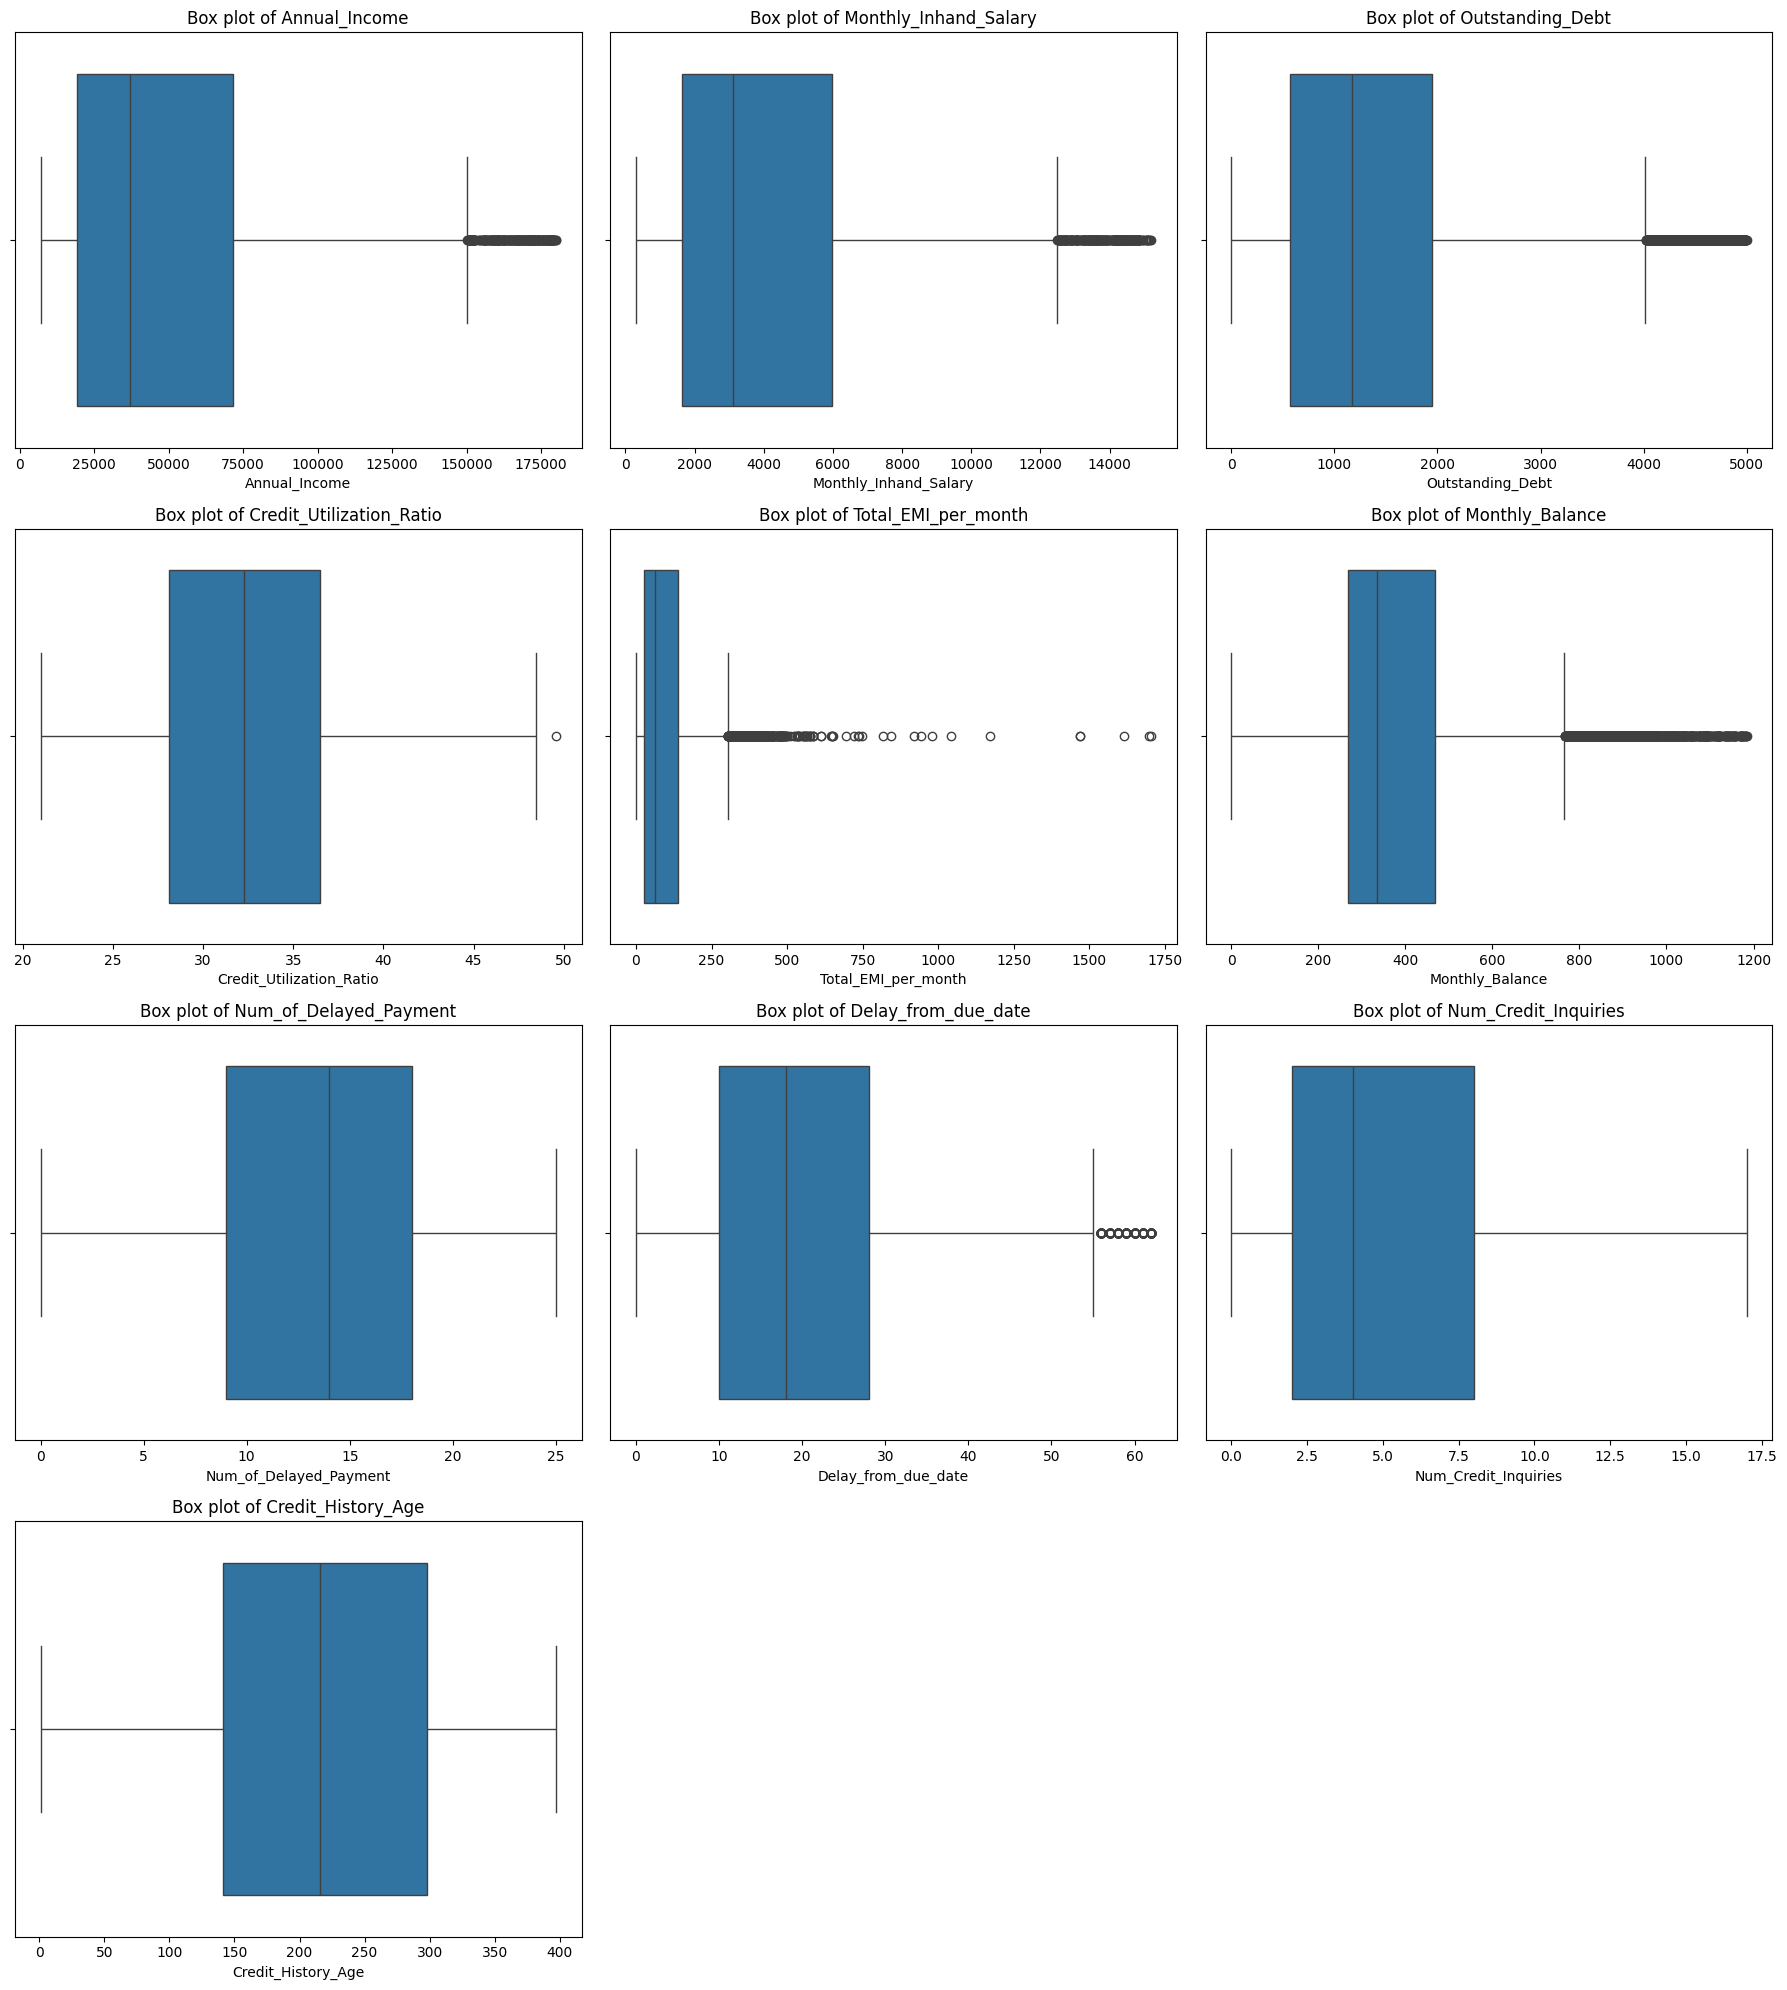

In [ ]:
import math
num_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt',
            'Credit_Utilization_Ratio', 'Total_EMI_per_month',
            'Monthly_Balance', 'Num_of_Delayed_Payment',
            'Delay_from_due_date', 'Num_Credit_Inquiries',
            'Credit_History_Age']

cols_per_row = 3
rows = math.ceil(len(num_cols) / cols_per_row)

plt.figure(figsize=(cols_per_row * 6, rows * 5))  # Adjust size

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(x=df_unique[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

### **Detecting Outliers using IQR Method**

In [ ]:
# checking outliers for columns which are store in num_cols list by usig IQR(inter quartile range) method
num_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Monthly_Balance', 'Num_of_Delayed_Payment',
    'Delay_from_due_date', 'Num_Credit_Inquiries',
    'Credit_History_Age']
for col in num_cols:
  outlier_summary = {}
  Q1 = df_unique[col].quantile(0.25)
  Q3 = df_unique[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df_unique[(df_unique[col] < lower_bound) | (df_unique[col] > upper_bound)]

  outlier_summary[col] = {
      "outlier_count": outliers.shape[0],
      "lower_bound": lower_bound,
      "upper_bound": upper_bound
        }
  print(outlier_summary)

{'Annual_Income': {'outlier_count': 250, 'lower_bound': np.float64(-59167.77374999999), 'upper_bound': np.float64(150194.21625)}}
{'Monthly_Inhand_Salary': {'outlier_count': 253, 'lower_bound': np.float64(-4884.847083333333), 'upper_bound': np.float64(12484.819583333334)}}
{'Outstanding_Debt': {'outlier_count': 659, 'lower_bound': np.float64(-1503.7625), 'upper_bound': np.float64(4015.7975)}}
{'Credit_Utilization_Ratio': {'outlier_count': 1, 'lower_bound': np.float64(15.58709463703055), 'upper_bound': np.float64(48.98159954594318)}}
{'Total_EMI_per_month': {'outlier_count': 573, 'lower_bound': np.float64(-137.8119332311978), 'upper_bound': np.float64(304.8172538841731)}}
{'Monthly_Balance': {'outlier_count': 945, 'lower_bound': np.float64(-28.590184149506968), 'upper_bound': np.float64(765.6849733099286)}}
{'Num_of_Delayed_Payment': {'outlier_count': 0, 'lower_bound': np.float64(-4.5), 'upper_bound': np.float64(31.5)}}
{'Delay_from_due_date': {'outlier_count': 496, 'lower_bound': np.fl

### **Capping Outliers**

In [ ]:
#Cap outliers (Winsorization)
for col in num_cols:
  Q1 = df_unique[col].quantile(0.25)
  Q3 = df_unique[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_unique[col] = np.where(df_unique[col] < lower_bound, lower_bound, df_unique[col])
  df_unique[col] = np.where(df_unique[col] > upper_bound, upper_bound, df_unique[col])

#Exploratory Data Analysis

### **Chart-1 :** How 'Num_Credit_Inquiries vs Num_of_Delayed_Payment'

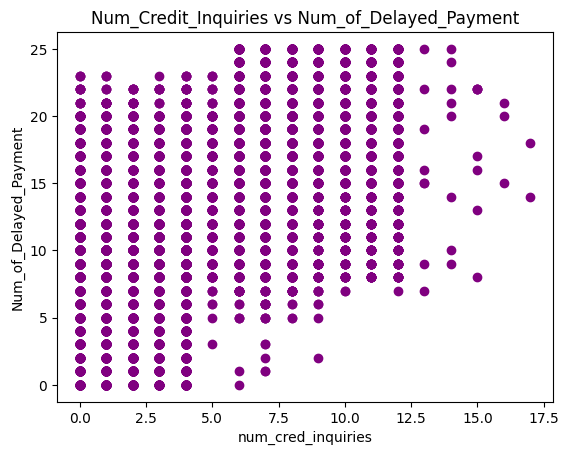

In [ ]:
# Scatter Plot | Continuous vs Continuous | Relationship between x vs y | both will be numerical
x_data = df_unique['Num_Credit_Inquiries']
y_data = df_unique['Num_of_Delayed_Payment']

plt.scatter(x_data, y_data, color='purple')
plt.title('Num_Credit_Inquiries vs Num_of_Delayed_Payment')
plt.xlabel('num_cred_inquiries')
plt.ylabel('Num_of_Delayed_Payment')
plt.show()

###**Why I choose this chart?**
Both Num_Credit_Inquiries and Num_of_Delayed_Payment are continuous/count numerical variables.
A scatter plot is the most appropriate visualization to:
*  Observe how one variable changes with respect to another.
*  Identify whether a relationship exists (positive, negative, or none)

### **Insights from above Graph**

1.  Customers with 10–17 inquiries mostly fall in the 7–25 delayed payments range.
2.   Very few customers with high inquiries have low delayed payments.
3.   As number of credit inquiries increases, the number of delayed payments generally increases.

This suggests that customers who frequently apply for credit are more likely to miss payments.



###**Will the gained insights help creating a positive business impact?**
Helps identify high-risk customers early

Banks can tighten credit approval or set stricter limits for customers with many inquiries.

✅This reduces future defaults and bad loans

### **Chart-2 :**'Credit_score' vs 'No_Delay_payments'

In [ ]:
## countplot for checking payment behavior differs across credit score categories
fig = px.histogram(
    df_unique,
    x='Credit_Score',
    color='Payment_of_Min_Amount',
    barmode='group',
    text_auto=True
)
fig.show()

###**Why I choose this chart?**

**1.To analyze the distribution of credit scores**

Credit_Score is a numerical variable, and a histogram is the best way to:


*  Understand how credit scores are distributed across customers

* Identify common score ranges (low, medium, high)   


**2. To compare behavior based on minimum payment status**

Payment_of_Min_Amount is a categorical variable.
Using color and barmode='group' allows:

* Direct comparison of credit score distributions between customers who pay vs do not pay the minimum amount.

*   Identification of behavioral differences across credit score ranges.


### **Insights from above Graph**

1️⃣ Paying only the minimum = higher risk
Customers who pay only the minimum amount mostly have poor credit scores.

2️⃣ Good credit customers pay more than the minimum
Customers with good credit usually do not rely on minimum payments.

3️⃣ Standard credit customers need attention
They show mixed behavior and can improve or worsen based on how they pay.

4️⃣ Missing payment info can hide risk
Customers with missing payment data may still be risky and should be monitored.

###**Will the gained insights help creating a positive business impact?**
Yes — these insights clearly help create a positive business impact. Below is a business-oriented justification, followed by risk awareness and recommendations.

**1.Minimum-only payers = higher-risk customers**

Insight: Customers who pay only the minimum mostly have poor credit scores.
Business impact:

*   Enables early identification of high-risk customers
*   Allows tighter credit limits and closer monitoring

✅ Reduces future delinquencies and defaults

**2.Good credit customers pay more than the minimum**

Insight: Strong credit customers typically pay beyond the minimum.
Business impact:


*  Helps identify low-risk, high-value customers
*  Enables upselling of premium products and higher limits

✅ Increases profitability with minimal risk

###**Chart-3:** Debt-to-Income Ratio by Credit Score"

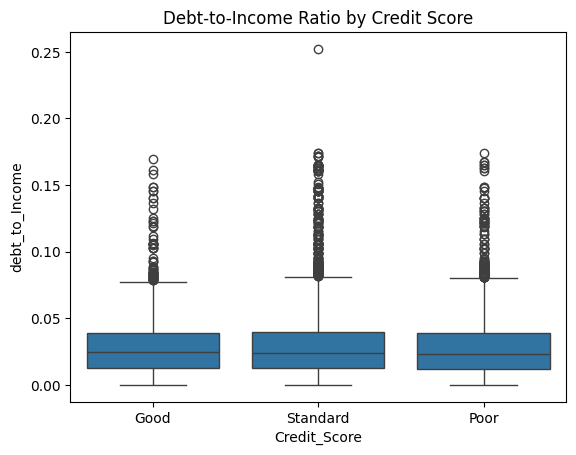

In [ ]:
# Extracting the insights from DTI and credit Score
sns.boxplot(
    x ='Credit_Score',
    y ='debt_to_Income',
    data=df_unique
)
plt.title("Debt-to-Income Ratio by Credit Score")
plt.show()

###**Why I choose this chart?**
I choose a box plot because it is especially well-suited for comparing a numeric variable across categories. In given case:

X-axis (Credit_Score) → categorical (e.g., Poor / Standard / Good or score bands)

Y-axis (debt_to_Income) → continuous numeric value

### **Insights from above Graph**

1.   Good credit customers have slightly lower DTI.
2.  Standard and Poor customers show higher and wider DTI spread.


###**Will the gained insights help creating a positive business impact?**
Yes — the insights from this chart can create a positive business impact, especially in credit risk, lending, and customer segmentation decisions.

1.**Better credit risk assessment**

From the box plot, you can observe that:


*  Customers with Poor credit scores generally show higher and more variable DTI ratios
*  Good credit score customers tend to have lower and more stable DTI

**Business impact:**
Lenders can use this relationship to improve risk models, as high DTI + poor credit score often signals higher default risk.

**2. Improved loan approval and pricing decisions**

Applicants with lower DTI and good credit can be offered:


*   Faster approvals
*   Lower interest rates

Applicants with higher DTI may require:

*   Additional verification
*   Adjusted loan terms



**Business impact:**
This leads to reduced loan losses while still approving profitable customers.


### **Chart-4:** Finding relation between "Outstanding Debt by Age Group"




In [ ]:
# creating a box plot between outstanding debt and age group
fig = px.box(
    df_unique,
    x='Age_Group',
    y='Outstanding_Debt',
    title='Outstanding Debt by Age Group',
    labels={'Age_Group': 'Age Group', 'Outstanding_Debt': 'Outstanding Debt'},
    color='Age_Group',          # optional: color by Age_Group for better visual
    points='all'                # optional: show all individual data points
)

fig.show()

###**Why I choose this chart?**

Age_Group is a categorical variable, and Outstanding_Debt is a numerical variable.
A box plot is ideal for:

Comparing distributions of a numeric variable across categories

Seeing how debt varies between different age groups

###**Insights from above Graph**

1.  Younger customers have lower debt (Young customers have limited credit exposure).
2.  Debt increases in middle age, 26–45 age groups show higher and wider debt distribution (This is the high borrowing phase [home loans, personal loans]).
3.  Outstanding debt generally increases with age until mid-life and then stabilizes.





###**Will the gained insights help creating a positive business impact?**
Yes — these insights strongly support positive business impact. Here’s a clear justification linked directly to business value:

**1. Age-based customer segmentation**

Insight: Younger customers have lower outstanding debt due to limited credit exposure.
Business impact:

*   Enables starter credit products (low-limit cards, small loans)
*   Builds early customer relationships with controlled risk

✅ Supports long-term customer lifetime value


**2.Optimized lending strategies for middle-aged customers**

Insight: Ages 26–45 show higher and wider debt distribution (peak borrowing phase).
Business impact:

Identifies the most profitable lending segment

Enables targeted offers for:

Home loans

Personal loans

Credit cards
✅ Increases revenue while aligning with customer needs

**3. Personalized product design**

Using age-related debt patterns, businesses can:

*   Customize credit limits and EMIs by age group
*   Offer flexible repayment options

✅ Enhances customer satisfaction and retention

##**Chart - 5**

In [ ]:
# looking for ccorelation between numeric columns
corr = df_unique.select_dtypes(include="number").corr()
fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="blues"  # 👈 change here
)

fig.show()

##**Why I choose this chart?**
To identify relationships among multiple numeric variables at once.

A correlation heat map:
* Strong positive correlations (darker blue)
* Strong negative correlations (lighter shades)

Shows pairwise relationships between all numeric features simultaneously

Avoids creating multiple individual plots
✅ Saves time and gives a holistic view




##**Insights -**

Credit_Utilization_Ratio is: Positively correlated with Num_of_Delayed_Payment
→ Higher utilization is associated with more payment delays.

Credit_Utilization_Ratio is: Negatively correlated with Monthly_Balance
→ High credit usage leaves less remaining balance.

Monthly_Inhand_Salary shows a strong positive correlation with Total_EMI_per_month and Monthly_Balance.
→ Higher income individuals tend to have higher EMIs and still maintain higher balances.

Total_EMI_per_month is negatively correlated with Monthly_Balance.
→ As EMI obligations increase, remaining monthly balance tends to decrease.

###**Will the gained insights help creating a positive business impact?**
Yes — these insights clearly help create a positive business impact. Below is a justified, business-focused explanation aligned with each insight:

1.**Credit Utilization vs Delayed Payments**

Insight: Higher credit utilization is linked to more delayed payments.
Business impact:

Enables early risk detection of customers likely to miss payments

Banks can set utilization thresholds and trigger alerts

Helps reduce future defaults and NPAs
✅ Improves portfolio quality

**EMI vs Monthly Balance**

Insight: Higher EMI reduces remaining balance.

Business impact:
Helps design affordable EMI structures

Reduces repayment stress and delinquencies

Improves long-term customer satisfaction

# **Conclusion**

The analysis shows clear patterns that help identify risky customers early. Customers who pay only the minimum amount are more likely to have poor credit, while good credit customers usually pay more than the minimum and manage their finances better. Customers with standard credit are in the middle and need close monitoring because their behavior can either improve or get worse. Missing payment information can hide risk and should not be ignored.

High credit usage is a strong warning sign. When customers use too much of their available credit, they are more likely to delay payments and have less money left at the end of the month. Even customers with higher income can feel financial pressure if their monthly loan payments (EMIs) become too high.

Debt also changes with age. Younger customers usually have lower debt, while people aged 26–45 tend to borrow the most due to major life expenses. After this stage, debt levels usually stabilize. Customers with good credit generally have lower debt-to-income ratios, while standard and poor credit customers show higher financial stress.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***